# Sales Performance Analysis

This project analyzes sales data from a consumer electronics retail chain in the United States, covering transactions across multiple store locations throughout the year 2019.

**Goals:**
- Identify which months generated the highest revenue
- Understand city-based sales distribution
- Analyze customer purchase behavior
- Discover the most profitable products

The goal is to provide actionable insights that can support business decisions related to marketing timing, inventory planning, and regional sales strategies.

## 1. Load and Combine Monthly Sales Data

Read all monthly sales files and concatenate them into a single DataFrame for full-year analysis.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import calendar

In [ ]:
# List all CSV files in the folder
files = [file for file in os.listdir('./data') if file.endswith('.csv')]

# Empty DataFrame to collect all data
all_data = pd.DataFrame()

# Loop through files and append each DataFrame
for file in files:
    df = pd.read_csv(f'./data/{file}')
    all_data = pd.concat([all_data, df])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## 2. Clean the Data

Filter out rows with missing values and incorrect headers to ensure data consistency.

In [ ]:
# Drop rows with any missing values
all_data.dropna(how='any', inplace=True)

# Remove header rows mistakenly included in the data after concatenation
all_data = all_data[all_data['Order Date'] != 'Order Date']

C:\Users\iljag\AppData\Local\Temp\ipykernel_26764\2249737088.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(all_data['Order Date'])


0       2019-04-19 08:46:00
1       2019-04-07 22:30:00
2       2019-04-12 14:38:00
3       2019-04-12 14:38:00
4       2019-04-30 09:27:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

## 3. Analyze Sales by Month

Visualize total revenue for each month to identify trends in sales performance.

In [ ]:
# Add 'Month' column for grouping and specify format for quicker parsing
all_data['Month'] = pd.to_datetime(all_data['Order Date'], format="%m/%d/%y %H:%M").dt.month
all_data['Month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int32)

In [11]:
# Make columns correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [12]:
# Calculate monthly sales performance by multiplying 'Quantity Ordered' and 'Price Each' and grouping by month
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
monthly_sales = all_data.groupby('Month')['Sales'].sum()

Text(0.5, 1.0, 'Monthly Sales Performance')

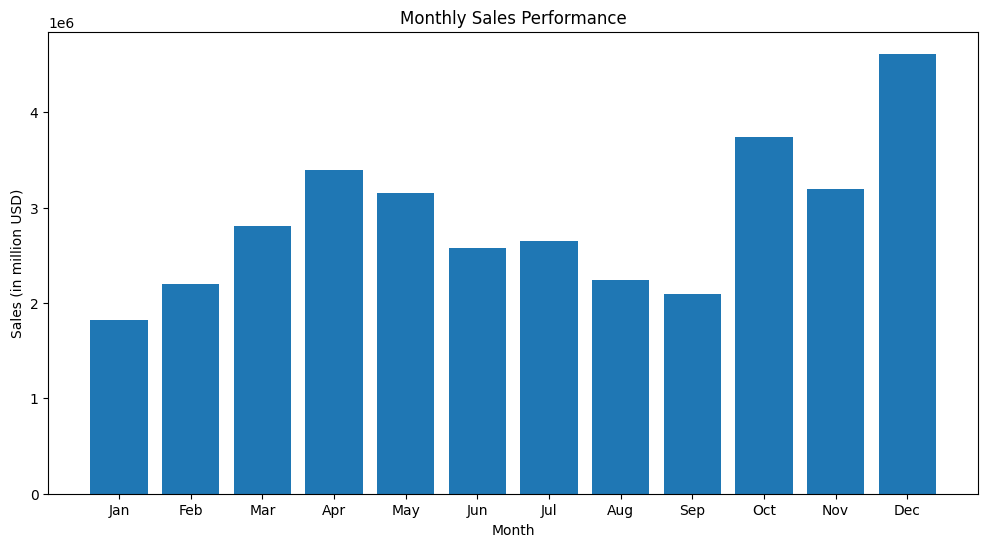

In [13]:
# Convert month numbers to month names for better readability
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

# Plotting the monthly sales performance
plt.figure(figsize=(12, 6))
plt.bar(month_names, monthly_sales)
plt.xlabel('Month')
plt.ylabel('Sales (in million USD)')
plt.title('Monthly Sales Performance')

## 4. Analyze Sales by City

Visualize total revenue for each city to optimize regional marketing and inventory distribution.

In [14]:
# Extract the city and state from the 'Purchase Address' column
# Format: '917 1st St, Dallas, TX 75001' → city = 'Dallas', state = 'TX' → combined = 'Dallas (TX)'
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip()} ({x.split(',')[2].strip().split(' ')[0]})")

# Group by city and sum the sales
city_sales = all_data.groupby('City')['Sales'].sum()

Text(0.5, 1.0, 'Total Sales by City')

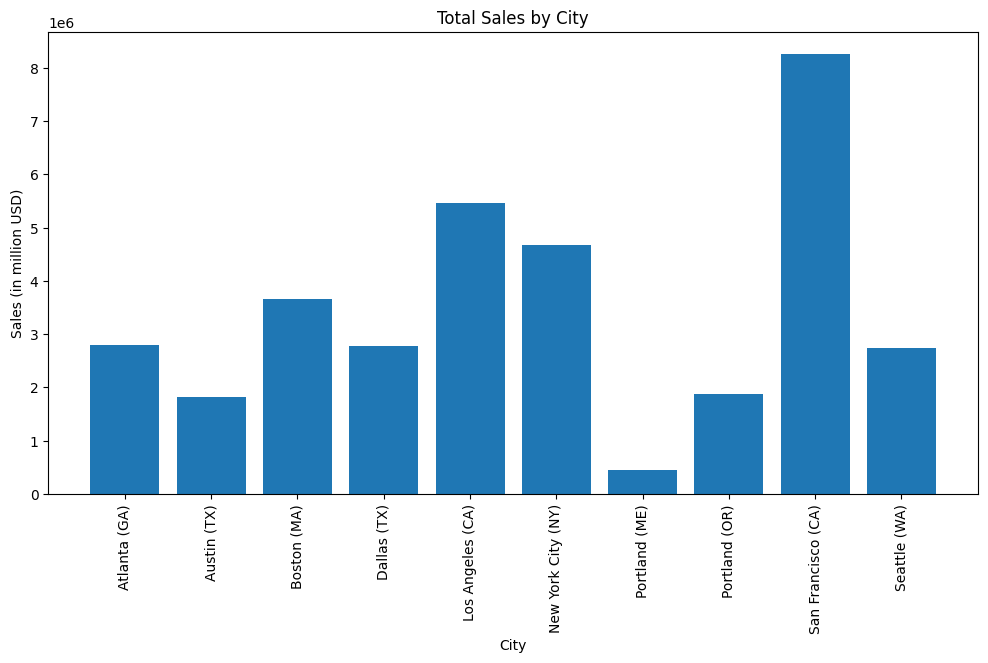

In [15]:
# Plotting the revenue by City
cities = [city for city, df in all_data.groupby('City')]

plt.figure(figsize=(12,6))
plt.bar(cities, city_sales)
plt.xticks(rotation='vertical', size=10)
plt.ylabel('Sales (in million USD)')
plt.xlabel('City')
plt.title('Total Sales by City')

## 5. Analyze Sales by Hour

Identify the time of day, when the most purchases are made to maximize the efficiency of advertisement.

In [ ]:
# Extract the hour from the 'Order Date' column and specify format for quicker parsing
all_data['Hour'] = pd.to_datetime(all_data['Order Date'], format="%m/%d/%y %H:%M").dt.hour

In [23]:
# Group sales data by hour and count the number of orders
orders_by_hour = all_data.groupby('Hour').count()

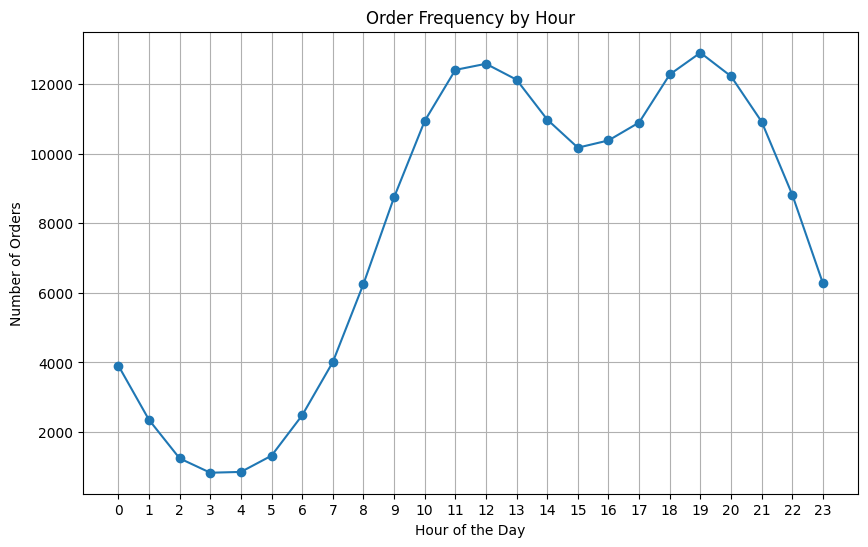

In [24]:
# Visualize order frequency by hour
plt.figure(figsize=(10,6))
plt.plot(orders_by_hour.index, orders_by_hour['Order ID'], marker='o') # Set marker to 'o' for better visibility
plt.xticks(orders_by_hour.index)
plt.grid() # Grid for better readability

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Order Frequency by Hour')
plt.show()

# Display advertisements slightly before 11am and/or 6pm

## 6. Analyze Sales by Hour and City

Identify whether certain cities have different peak purchasing times. This allows for region-specific marketing strategies and better inventory planning.

In [19]:
# Group data by city and hour, counting the number of orders and convert it to a DataFrame
orders_by_city_hour = all_data.groupby(['City', 'Hour']).count()['Order ID'].unstack()

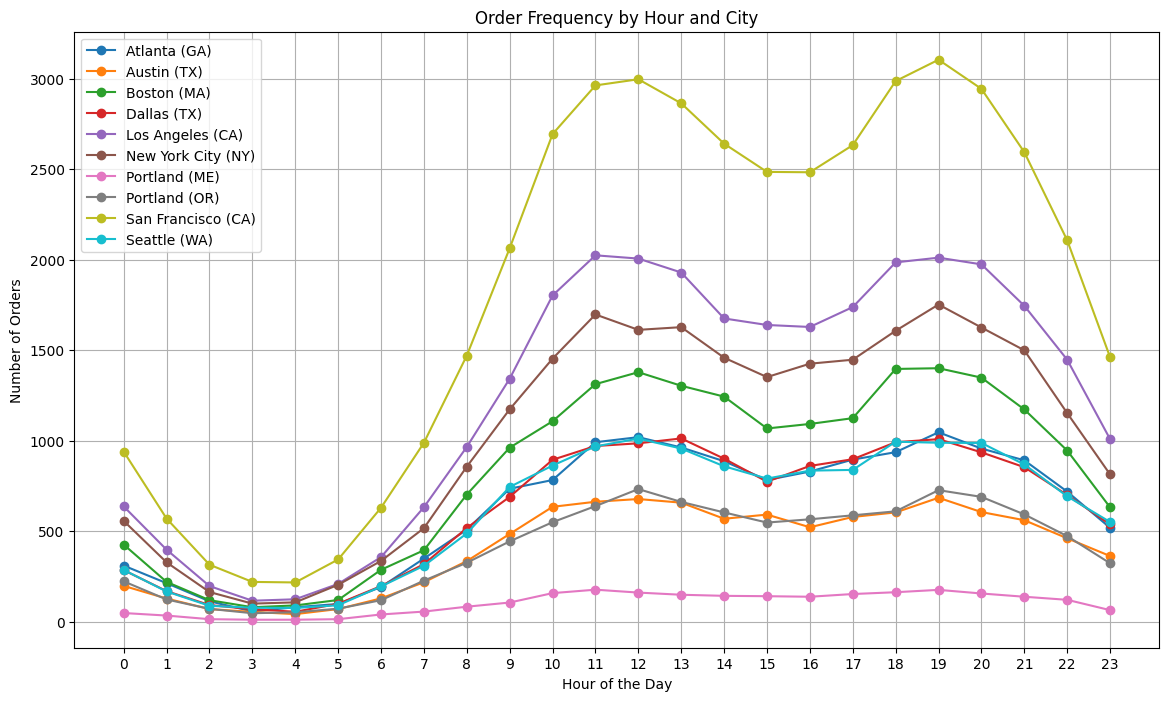

In [20]:
# Plot sales by hour for each city
plt.figure(figsize=(14,8))

for city in orders_by_city_hour.index:
    plt.plot(orders_by_city_hour.columns, orders_by_city_hour.loc[city], marker='o', label=city)

plt.xticks(orders_by_city_hour.columns)
plt.grid()

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Order Frequency by Hour and City')
plt.legend()

## 7. Analyze the profitability of Products

Identify which products generate the highest total revenue. This can help the business optimize inventory and prioritize marketing efforts for top earners.

In [39]:
# Calculate total revenue per product
product_revenue = all_data.groupby('Product')['Sales'].sum()

# Sort by revenue
product_revenue = product_revenue.sort_values(ascending=False)

Text(0.5, 1.0, 'Total Revenue per Product')

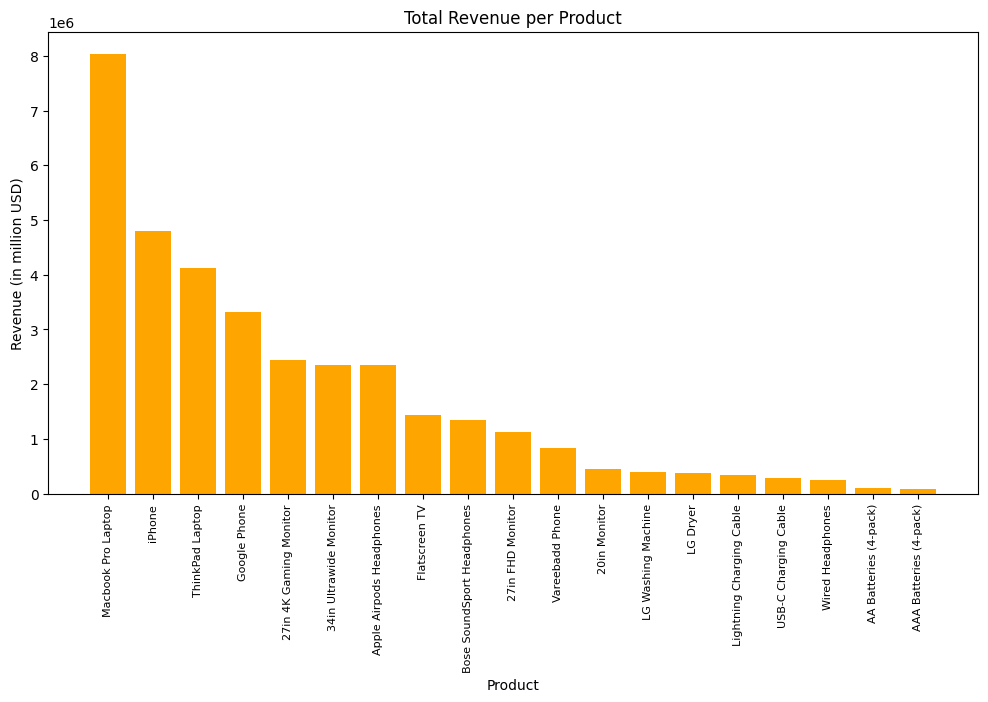

In [41]:
# Plot revenue per product
plt.figure(figsize=(12, 6))
plt.bar(product_revenue.index, product_revenue, color='orange')
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Revenue (in million USD)')
plt.xlabel('Product')
plt.title('Total Revenue per Product')

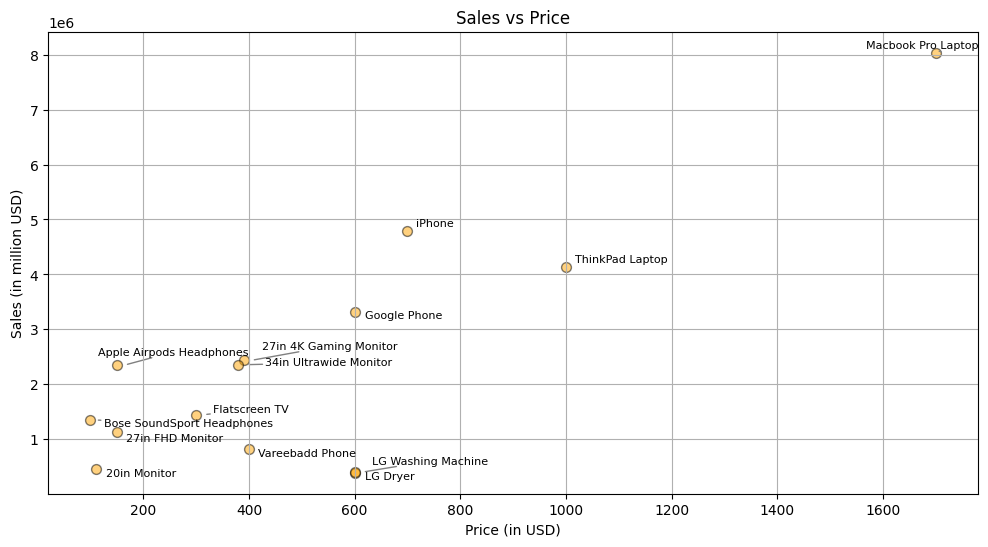

In [ ]:
# -> Products with the highest Revenue seem to be the most expensive, maybe plot it against Price
# Get the average product price and total revenue per product for products with price >= 50 
# to exclude low-priced items for better visualization
product_prices = all_data[all_data['Price Each'] >= 50].groupby('Product')['Price Each'].mean()
product_revenue = all_data[all_data['Price Each'] >= 50].groupby('Product')['Sales'].sum()

# Plot the relationship between Product Price and Revenue
plt.figure(figsize=(12, 6))
plt.scatter(product_prices, product_revenue, alpha=0.5, s=50, c='orange', edgecolors='k') # adjust the size 
plt.title('Sales vs Price')
plt.xlabel('Price (in USD)')
plt.ylabel('Sales (in million USD)')
plt.grid()

# Annotate each point with the product name
texts = []
for product in product_prices.index:
    text = plt.text(
        product_prices[product] + 15,           # x-coordinate
        product_revenue[product] + 15,          # y-coordinate
        product,                                # Text (product name)
        fontsize=8, ha='left', va='bottom',     # Alignment
    )
    texts.append(text)

# import adjustText to improve readability of the Product Names
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))
plt.show()

# Most Products follow the pattern of higher prices leading to higher sales.
# Some are exceptions to this trend, positive ones include the Iphone and Apple Airdops Headphones, 
# negative ones include the LG Washing Machine, LG Dryer and and the Vaarebadd Phone